# Multiple Linear Regression From Scratch (with Numpy)

## Setup

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [100]:
Xtrain1 = np.array([1,3,4,5,7,8]) # initialising the values in the training set. this particular variable is feature 1
Xtrain2 = np.array([2,3,5,7,10,11]) # feature 2
y = np.array([0,1.5,3,4,6,7]) # the true label values

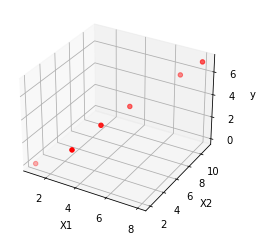

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xtrain1, Xtrain2, y, c='r')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.show()

## The Model

The linear regression model is as such: $$ \hat{y} = \overrightarrow{w}.\overrightarrow{x} + b $$ .The task of the gradient descent algorithm is to find the suitable parameter values \(w\) and \(b\).

In order to find \(w\) and \(b\), one needs to minimize this cost function:

$$ Mean Squared Error (MSE) = \frac{1}{2m} \sum_{i=1}^m (\hat{y} - y)^2 $$


$$ \hat{y} $$ is the predicted value,
$$ y $$ is the actual value,
$$ m $$ is the number of observations

In [121]:
m = len(y)  # number of observations
alpha = 0.01  # learning rate for gradient descent
iterations = 1500  # Number of graident descent iterations 

In [136]:
#initialising the parameters

w1 = 0
w2 = 0
b = 0

In [137]:
def calculateyhat (X1, X2, w1, w2, b): # setting up a function to calculate the prediction of the model
    yhat = w1 * X1 + w2 * X2 + b
    return yhat

In [138]:
def mse(yhat, yi): # setting up a function to calculate the cost of the model
    m = len(yi)
    mse = (1 / (2 * m) * np.sum((yhat - y) ** 2))
    return mse
    

## Gradient descent

In order to minimise the cost function, we need to work out where the minmum point of the cost function J would be. 




## A hypothetical cost function plot

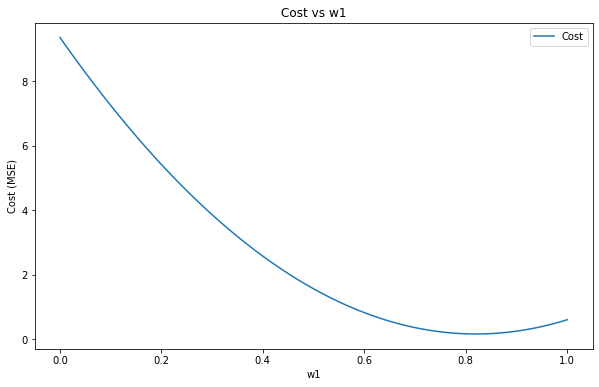

In [139]:
testcosts = {}


for w1 in np.arange(1, -0.01, -0.01):
    yh = calculateyhat(Xtrain1, Xtrain2, w1, w2, b)
    testcosts[w1] = mse(yh, y)

# Plot costs vs w1 values
w1_values = list(testcosts.keys())
costs = list(testcosts.values())

plt.figure(figsize=(10, 6))
plt.plot(w1_values, costs, label='Cost')
plt.xlabel('w1')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs w1')
plt.legend()
plt.show()

## Understanding the gradient descent process

The goal of gradient descent is to identify the minimum points of the MSE cost function. In reality we'll be doing this for w1, w2 and b. So it would not be a 2d graph, but there would still be a minimum point, as it is a convex function.

If we take a point on this graph, and identify gradient of the slope of that point, we can find the direction towards the minimum. Each step (iteration) of gradient descent will be a step in the direction of that minimum.

Getting the gradient means getting the partial deriviatives for w1, w2 and b

$$ \frac{dJ}{dw_1} = \frac {1}{m} \sum_{i=1}^m X_1((\hat{y} - y))  $$

$$ \frac{dJ}{dw_2} = \frac {1}{m} \sum_{i=1}^m X_2((\hat{y} - y))  $$

$$ \frac{dJ}{dw_b} = \frac {1}{m} \sum_{i=1}^m b((\hat{y} - y))  $$

We want to take a step in the direciton of the global minimum at each iteration of gradient descent. For example (where alpha is the learning rate):

$$ w_1 = w_1 - \alpha \frac{dJ}{dw_1} $$
$$ w_2 = w_2 - \alpha \frac{dJ}{dw_2} $$
$$ b = b - \alpha \frac{dJ}{db} $$

In [140]:
costs = {}

# Performing gradient descent as per the equations above
for iteration in range(iterations):
    yh = calculateyhat(Xtrain1, Xtrain2, w1, w2, b)
    d_w1 = (1 / m) * np.sum((yh - y) * Xtrain1)
    d_w2 = (1 / m) * np.sum((yh - y) * Xtrain2)
    d_b = (1 / m) * np.sum(yh - y)
    
    w1 = w1 - alpha * d_w1
    w2 = w2 - alpha * d_w2
    b = b - alpha * d_b
    
    if iteration % 100 == 0:
        print(f"iteration {iteration}. w1 = {w1} w2 = {w2} b = {b}. MSE = {mse(yh, y)}")
    costs[iteration] = mse(yh, y)

print(f"Final parameters. w1: {w1}, w2: {w2}, b: {b}")

iteration 0. w1 = 0.22416666666666601 w2 = 0.30750000000000033 b = 0.03583333333333338. MSE = 9.354166666666686
iteration 100. w1 = 0.29778400362602664 w2 = 0.40279317867131503 b = -0.1666098872707024. MSE = 0.10173884027693647
iteration 200. w1 = 0.3162726855975152 w2 = 0.4107366647653938 b = -0.33898789482880903. MSE = 0.07141581603318622
iteration 300. w1 = 0.336708884302035 w2 = 0.4132564658518781 b = -0.4791483277445706. MSE = 0.05121480364748863
iteration 400. w1 = 0.35814008678861 w2 = 0.411823541388577 b = -0.5933397062010816. MSE = 0.03762787931456071
iteration 500. w1 = 0.3798611265489277 w2 = 0.4075749159823346 b = -0.6865745126353214. MSE = 0.028389139130936065
iteration 600. w1 = 0.4013588366591741 w2 = 0.40138472308501594 b = -0.7628761719856803. MSE = 0.022029788706486517
iteration 700. w1 = 0.4222684072753296 w2 = 0.3939205517385839 b = -0.8254764324268422. MSE = 0.017593597086300976
iteration 800. w1 = 0.442339032771073 w2 = 0.3856880977474664 b = -0.8769731321203265. 

In [141]:
## Plotting how cost decreases per iteration

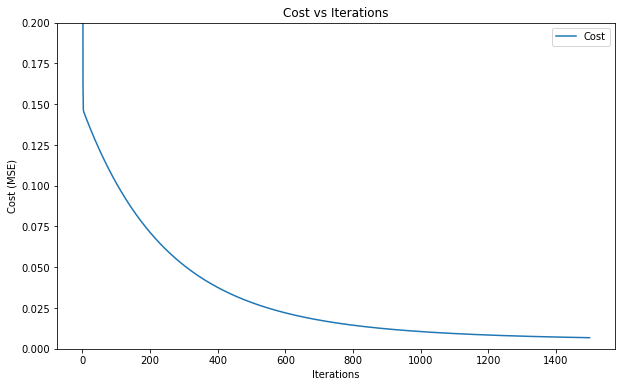

In [142]:
iterations_list = list(costs.keys())
costs_list = list(costs.values())

plt.figure(figsize=(10, 6))
plt.plot(iterations_list, costs_list, label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Iterations')
plt.legend()
plt.ylim(0,0.2)
plt.show()

## Plotting the model's predictions vs the actual values

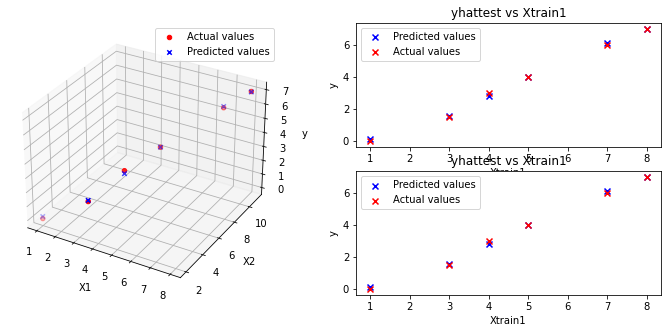

In [143]:
yhat = calculateyhat(Xtrain1, Xtrain2, w1, w2, b)

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(Xtrain1, Xtrain2, y, c='r', marker='o', label='Actual values')
ax.scatter(Xtrain1, Xtrain2, yhat, c='b', marker='x', label='Predicted values')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.legend()

ax1 = fig.add_subplot(222)
ax1.scatter(Xtrain1, yhat, c='b', marker='x', label='Predicted values')
ax1.scatter(Xtrain1, y, c='r', marker='x', label='Actual values')
ax1.set_xlabel('Xtrain1')
ax1.set_ylabel('y')
ax1.set_title('yhattest vs Xtrain1')
ax1.legend()

ax1 = fig.add_subplot(224)
ax1.scatter(Xtrain1, yhat, c='b', marker='x', label='Predicted values')
ax1.scatter(Xtrain1, y, c='r', marker='x', label='Actual values')
ax1.set_xlabel('Xtrain1')
ax1.set_ylabel('y')
ax1.set_title('yhattest vs Xtrain1')
ax1.legend()


plt.show()

## Plotting predictions of unseen values

In [146]:
Xtest1 = np.array([3,4,6,7,14,17])
Xtest2 = np.array([5,7,14,16,25,30])
yhattest = calculateyhat(Xtest1, Xtest2, w1, w2, b)

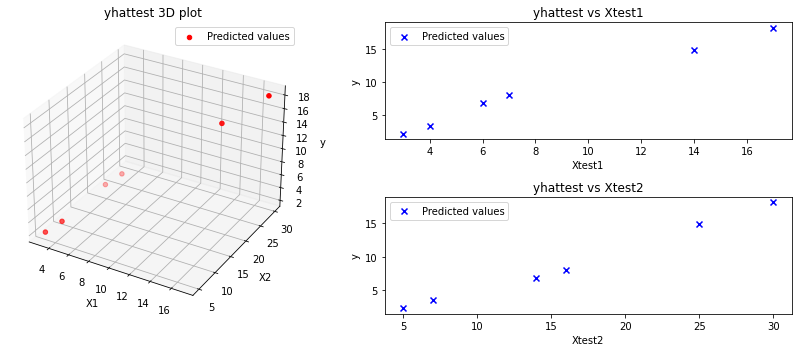

In [147]:
fig = plt.figure(figsize=(12, 5))


ax = fig.add_subplot(121, projection='3d')
ax.scatter(Xtest1, Xtest2, yhattest, c='r', marker='o', label='Predicted values')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.legend()
ax.set_title('yhattest 3D plot')

ax1 = fig.add_subplot(222)
ax1.scatter(Xtest1, yhattest, c='b', marker='x', label='Predicted values')
ax1.set_xlabel('Xtest1')
ax1.set_ylabel('y')
ax1.set_title('yhattest vs Xtest1')
ax1.legend()


ax2 = fig.add_subplot(224)
ax2.scatter(Xtest2, yhattest, c='b', marker='x', label='Predicted values')
ax2.set_xlabel('Xtest2')
ax2.set_ylabel('y')
ax2.set_title('yhattest vs Xtest2')
ax2.legend()

plt.tight_layout()
plt.show()

## That's all!

Now we can see that the model is making reasonable predictions on the unseen data, we know that the job here is done!